In [1]:
# set up
import sklearn
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Training and Visualising a Decision Tree

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

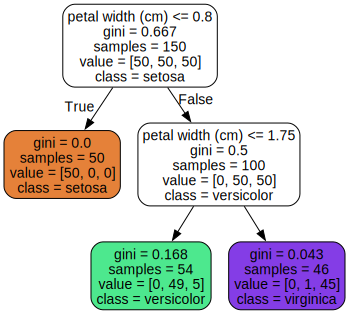

In [3]:
# visualise the trained decision tree
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(
    tree_clf,
    out_file='iris_tree.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Source.from_file('iris_tree.dot')

# Estimating Class Probabilities

In [4]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

### $\frac{0}{54}$, $\frac{49}{54}$, $\frac{5}{54}$

In [5]:
tree_clf.predict([[5, 1.5]])

array([1])

# Regression

In [6]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

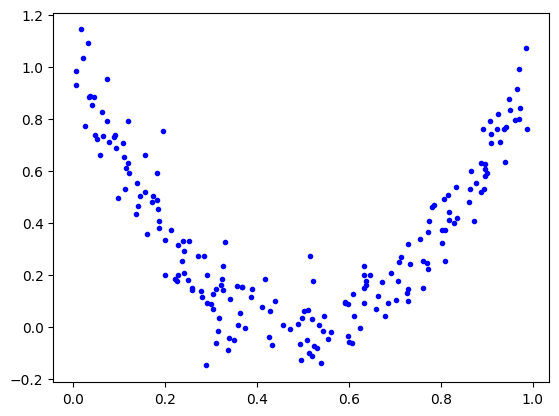

In [7]:
plt.plot(X, y, 'b.')

In [8]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

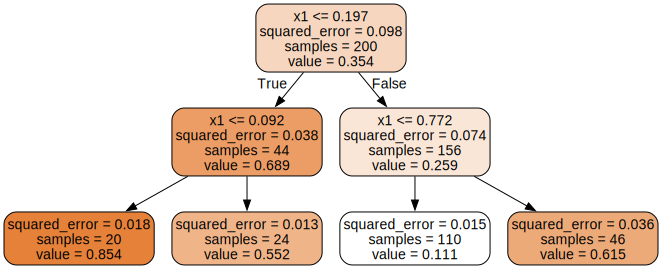

In [9]:
export_graphviz(
    tree_reg,
    out_file='iris_reg_tree.dot',
    feature_names=['x1'],
    rounded=True,
    filled=True
)
Source.from_file('iris_reg_tree.dot')

# Instability

1. Decision trees love orthogonal decision boundaries, which makes them sensitive to training set rotation.
2. Decision trees are very sensitive to small variations in the training data.